# Lower Limit on the Stochastic GWB 

To find a rough estimate of the lower limit on the stochastic GWB from our source, we will use the Phinney (2001) formalism. Eq. 5 in that paper gives us the characteristic strain of the background as a function of frequency:

$$h_c^2(f) = \frac{4G}{\pi c^2} \frac{1}{f^2} \int n(z) \frac{1}{1+z} \left( f_r \frac{dE_{gw}}{df_r}\right) \bigg|_{~f_r = f(1+z)} dz$$

where $n(z)$ is the number density of sources, $f_r$ is the frequency in the rest-frame of the source, and 

$$\frac{dE_{gw}}{df_r} = \frac{\pi}{3G} \frac{(G\mathcal{M})^{5/3}}{(\pi f_r)^{1/3}}$$

This equation implicitly assumes just one chirp mass for all objects. However, we would like to integrate over a range of chirp masses. We then want the number density *per mass* of objects (to make the units right). Then, our equation is:

$$h_c^2(f) = \frac{4G}{\pi c^2} \frac{1}{f^2} \int n(z, \mathcal{M}) \frac{1}{1+z} \left( f_r \frac{\pi}{3G} \frac{(G\mathcal{M})^{5/3}}{(\pi f_r)^{1/3}}\right) \bigg|_{~f_r = f(1+z)} dz~d\mathcal{M}$$

We will compute $h_c(f)$ for three different assumptions about the number density:
1. Our object is the only one in SDSS out to $z=0.2$ and the number density of objects is constant with both redshift and chirp mass.
2. All objects like J1010+1413 are also binary AGN that should merge by today. In addition, we allow the number density of objects to vary with redshift in conjunction with the observed AGN number density evolution.
3. Same as the second case, but we allow for the number density to vary with mass, following the observed local BH mass function.

Note that we here ignore the issue of *when* exactly these sources will be in the PTA band -- we just assume that all of our sources would be in the PTA band by today. We also only consider equal mass mergers.

## Case 1: Only Object in SDSS + Constant Number Density

We will assume that the number density per mass is *constant* and equal to what we find for our object. In other words,

Specifically, we will calculate our number density per mass as:

$$n_0 = \frac{N}{\Delta V \Delta \mathcal{M}}$$

where $N$ is the number of sources. Note that now this number does not depend on the actual integration variables anymore. So, pulling out the number density per mass and cleaning up our equation, we find:

$$h_c^2(f) = \frac{4}{3\pi^{1/3}c^2} \frac{n_0}{f^{4/3}} \int \frac{(G\mathcal{M})^{5/3}}{(1+z)^{1/3}} dz~d\mathcal{M}$$

To keep our code general, we will integrate from $z_{\rm{min}}$ to $z_{\rm{max}}$ and $\mathcal{M}_{\rm{min}}$ to $\mathcal{M}_{\rm{max}}$. Then, our final equation is:

$$h_c^2(f) = \frac{3G^{5/3}}{4\pi^{1/3}c^2} \frac{n_0}{f^{4/3}} \left[(1+z_{\rm{max}})^{2/3} - (1+z_{\rm{min}})^{2/3}\right]\times \left[\mathcal{M}_{\rm{max}}^{8/3} - \mathcal{M}_{\rm{min}}^{8/3}\right]$$

## Case 2: J1010+1413 has lots of buddies + number density changes with redshift

In this case, we need to be a bit more careful with how we calculate the number density.

Let $N_0$ refer to the number density of objects within the narrow redshift range around J1010+1413. Specifically,

$$N_0 = f_{\rm{merger}}\frac{N}{\Delta V(z=0.18 - 0.22)}$$

where $N$ is the total number of objects that are like J1010+1413 in the redshift range z=0.18-0.22 and $f_{\rm{merger}}$ is the observed fraction of AGN that are in merging systems at z=0.25 and with $L_{\rm{AGN}}=10^{46}~\rm{erg/s}$ (see Hickox+ 2014, Fig. 6, dashed, blue line).

This will anchor the number density of objects contributing to the PTA band *today*. To get the number density as a function of redshift, we simply multiply this by the functional form of the observed AGN number density (Hopkins 2007), $\hat{N}(z)$.

Finally, we obtain a number density/mass just as before:

$$n(z,\mathcal{M}) = \frac{N_0\ \hat{N}(z)}{\Delta \mathcal{M}} = n_0\ \hat{N}(z)$$


For our characteristic strain, we now have:


$$h_c^2(f) = \frac{4}{3\pi^{1/3}c^2} \frac{n_0}{f^{4/3}} \int (G\mathcal{M})^{5/3} \frac{\hat{N}(z)}{(1+z)^{1/3}} dz~d\mathcal{M}$$


We will need to do the redshift integral numerically, but we can at least do the mass integral analytically, giving us:

$$h_c^2(f) = \frac{G^{5/3}}{2\pi^{1/3}c^2} \frac{n_0}{f^{4/3}} \left[\mathcal{M}_{\rm{max}}^{8/3} - \mathcal{M}_{\rm{min}}^{8/3}\right] \int \frac{\hat{N}(z)}{(1+z)^{1/3}} dz $$

## Case 3: J1010+1413 has lots of buddies + number density changes with redshift & mass

In this case, we will allow the number density to vary with mass as well. In other words, 

$$n(z, \mathcal{M}) = n_0 p(\mathcal{M}) \hat{N}(z)$$

where $n_0$ is calculated as in case 2, and $p(\mathcal{M})$ is the probability of having a particular chirp mass. This is set by using the BH mass function at z=0 given by Marconi+ 2004 and normalizing this function to the number density at z=0 from case 2. We set our mass ratio = 1, thus there is a simple 1-1 and onto transformation from the BH mass function  to the chirp mass function. We just transform this by setting appropriate chirp mass limits in our integration.

Then, for our characteristic strain, we have:


$$h_c^2(f) = \frac{4}{3\pi^{1/3}c^2} \frac{n_0}{f^{4/3}} \int (G\mathcal{M})^{5/3} \frac{p(\mathcal{M})\hat{N}(z)}{(1+z)^{1/3}} dz~d\mathcal{M}$$

We will have to do both of these integrals numerically now.

In [1]:
## Import packages
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import WMAP9 as cosmo
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.stats import poisson_conf_interval
from scipy.integrate import quad, cumtrapz
from scipy.interpolate import UnivariateSpline

## Set plot parameters
%matplotlib inline
sns.set_context("paper", font_scale=1.5)
sns.set_style('ticks')
sns.set_palette('colorblind')
figparams = {'font.family': 'DejaVu Sans',
             'font.serif':'Times',
             'text.latex.preamble': [r'\usepackage{amsmath}'],
             'text.usetex': True,
             'hatch.linewidth' : 3.0}
plt.rcParams.update(figparams)
cs = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
# measured parameters (Goulding+ 2019)
l_agn_north = 4.2e46 * u.erg / u.s
l_agn_south = 5.4e46 * u.erg / u.s
min_mbh = 4e8 * u.Msun
mtot_bh = 8e8 * u.Msun
redshift = 0.2

# population parameters
lagn_min = 1e46 * u.erg / u.s  # min AGN lum for this type of source (Goulding+ 2019)
n_arcsecsq_lowest = 1. / 9380. * (u.deg ** -2)  # assuming our source is the only one in SDSS DR7 spectroscopic catalog (Abazajian+ 2009)
                                        ## this is the catalog used by Mullaney 2013.
merger_frac = 0.25  # (Hickox+ 2014, Fig. 6)

# integration parameters for GWB (Goulding+ 2019)
q = 1.  # i.e. assume equal mass mergers
max_mchirp = (1. / (1 + q) ** 2) ** (3. / 5.) * 1.e10 * u.Msun 
min_mchirp = (1. / (1 + q) ** 2) ** (3. / 5.) * 1.e8 * u.Msun
zmin = 0.0
zmax = 1.0

## set up plotting region for current best pta upper limits and future limits
freq = (np.logspace(-2, 2) / u.yr).to(u.Hz)
fidhz = (1. / u.yr).to(u.Hz)
ptalimit = 1.45e-15 * (freq / fidhz) ** (-2./3.)
iptafuturelimit = 4.e-16 * (freq / fidhz) ** (-2./3.)

max_mchirp

<Quantity 4.35275282e+09 solMass>

In [3]:
## Define functions
def chirp_mass(m1, m2):
    """Finds the chirp mass given the two black hole masses.
    
    Parameters
    ----------
    m1 : astropy.units.Quantity
        Mass of the first black hole.
        Units: Mass
    m2 : astropy.units.Quantity
        Mass of the second black hole.
        Units: Mass
    
    Returns
    -------
    astropy.units.Quantity
        Chirp mass for the binary system, in the same mass units as `m1` and `m2`.
    
    """
    return (m1 * m2 * (m1 + m2) ** (-1. / 3.)) ** (3. / 5.)


def numdensity(number_per_square_ang_, zmin_, zmax_):
    """Find number density of objects given number per sq angular size.
    
    Parameters
    ----------
    number_per_square_ang_ : astropy.units.Quantity
        Number density of black holes per square angle
        Units: Angle ** -2
    zmin_ : float
        Minimum redshift
    zmax_ : float
        Maximum redshift
        
    Returns
    -------
    astropy.units.Quantity
        The number density of objects in a given volume
        Units: Mpc ** -3

    """
    ##first convert to number/full sky
    num_full_sky = number_per_square_ang_ * (41253. * u.deg ** 2)
    ##now find total comoving volume between redshifts
    vol = cosmo.comoving_volume(zmax_) - cosmo.comoving_volume(zmin_)
    return (num_full_sky / vol).to(1 / u.Mpc ** 3)


def hc_constant_n(freq_, num_density_per_mass_, zmin_, zmax_, chirp_mass_min_, chirp_mass_max_):
    """Characteristic strain for n(z, M) = const.
    
    Calculated using the formula from Phinney 2001, eq. 11 assuming constant 
    n(z, M) and allowing for integration of M.
    
    Parameters
    ----------
    freq_ : astropy.units.Quantity
        Frequency at which strain is being calculated
        Units: Hz
    num_density_per_mass_ : astropy.units.Quantity
        Number density per unit mass of mergers today
    zmin_ : float
        Minimum redshift to integrate over
    zmax_ : float
        Maximum redshift to integrate over
    chirp_mass_min_ : astropy.units.Quantity
        Minimum chirp mass to integrate over
        Units: Mass
    chirp_mass_max_ : 
        Maximum chirp mass to integrate over
        Units: Mass
    
    Returns
    -------
    astropy.units.Quantity
        The characteristic strain at `freq_`, integrated over mass range considered.
    
    """
    coeffs = 3. * const.G ** (5. / 3.) / (4. * np.pi ** (1. / 3.) * const.c ** 2)
    numdens = num_density_per_mass_ * ((1 + zmax_) ** (2. / 3.) - (1 + zmin_) ** (2./3.))
    massfterm = (chirp_mass_max_ ** (8. / 3.) - chirp_mass_min_ ** (8. / 3.)) * freq_ ** (- 4. / 3.) 
    # is the above integral missing a factor of 3 / 8?
    # no, 3/4 in coefficients - combination of z and M integrals
    return ((coeffs * massfterm * numdens) ** (1. / 2.)).to('')


def zint(nz_, zmin_, zmax_):
    """Integrates number density of mergers over cosmic time.
    
    For use with calculating characteristic strain.
    
    Parameters
    ----------
    nz_ : function
        lambda function to calculate number density
    zmin_ : float
        Minimum redshift to integrate over
    zmax_ : float
        Maximum redshift to integrate over
    
    Returns
    -------
    float
        Comoving number density of merged remnants in the redhsift range considered.
        
    """
    integral = lambda z: nz_(z)/(1+z)**(-1./3.)
    return quad(integral, zmin_, zmax_)[0]
def hc_with_nz(freq_, nzm_, zmin_, zmax_, chirp_mass_min_, chirp_mass_max_):
    """Characteristic strain for n(z, M) = n(z).
    
    Calculated using the formula from Phinney 2001, eq. 11 assuming constant 
    n(M) with n(z) variable.
    
    Parameters
    ----------
    freq_ : astropy.units.Quantity
        Frequency at which strain is being calculated
        Units: Hz
    nzm_ : function
        lambda function for the number density as function of z
    zmin_ : float
        Minimum redshift to integrate over
    zmax_ : float
        Maximum redshift to integrate over
    chirp_mass_min_ : astropy.units.Quantity
        Minimum chirp mass to integrate over
        Units: Mass
    chirp_mass_max_ : 
        Maximum chirp mass to integrate over
        Units: Mass
    
    Returns
    -------
    astropy.units.Quantity
        The characteristic strain at `freq_`, integrated over mass range and z.
    
    """
    coeffs = const.G ** (5. / 3.) / (2. * np.pi ** (1. / 3.) * const.c ** 2)
    # should be a factor of 1/2, not 3/4
    numdensz = zint(nzm_, zmin_, zmax_) * 1. / u.Mpc ** 3 * 1. / u.Msun
    massfterm = (chirp_mass_max_ ** (8. / 3.) - chirp_mass_min_ ** (8. / 3.)) * freq_ ** (- 4. / 3.)
    return ((coeffs * massfterm * numdensz) ** (1. / 2.)).to('')
def massint(nzm_, mmin_, mmax_):
    """Integral over chirp mass for characteristic strain.
    
    Parameters
    ----------
    nzm_ : function
        lambda function for the number density of objects as a function of mass
    mmin_ : astropy.units.Quanitity
        minimum mass to integrate over
    mmax_ : astropy.units.Quantity
        maximum mass to integrate over
    
    Returns
    -------
    float
        Number density integrated over chirp mass range
    
    """
    integral = lambda m: (m) ** (5./3.) * nzm_(m)
    return quad(integral, mmin_.value, mmax_.value)[0]
def hc_with_nzm(freq_, nzm_, massf_, zmin_, zmax_, chirp_mass_min_, chirp_mass_max):
    """Characteristic strain with number density variable with redshift and chirp mass.
    
    Calculated using the formula from Phinney 2001, eq. 11 assuming constant 
    n(z, M) variable.
    
    Parameters
    ----------
    freq_ : astropy.units.Quantity
        Frequency at which strain is being calculated
        Units: Hz
    nzm_ : function
        lambda function for the number density as function of z
    massf_ : function 
        lambda function for the number density as function of M
    zmin_ : float
        Minimum redshift to integrate over
    zmax_ : float
        Maximum redshift to integrate over
    chirp_mass_min_ : astropy.units.Quantity
        Minimum chirp mass to integrate over
        Units: Mass
    chirp_mass_max_ : 
        Maximum chirp mass to integrate over
        Units: Mass
    
    Returns
    -------
    astropy.units.Quantity
        The characteristic strain at `freq_`, integrated over mass range and z.
    
    """
    coeffs = 4. * const.G ** (5. / 3.) / (3. * np.pi ** (1. / 3.) * const.c ** 2)
    numdensz = zint(nzm_, zmin_, zmax_) * 1. / u.Mpc ** 3 * 1. / u.Msun
    massterm = massint(massf_, chirp_mass_min_, chirp_mass_max) * u.Msun ** (8. / 3.)
    fterm = freq_ ** (- 4. / 3.)
    return ((coeffs * fterm * numdensz * massterm) ** (1. / 2.)).to('')

## Case 1

In [4]:
## First, let's calculate the number density in Mpc^-3
lowestnd = numdensity(n_arcsecsq_lowest, 0., redshift)
print("Lowest number density is: ", lowestnd)

Lowest number density is:  1.8605414725377198e-09 1 / Mpc3


In [5]:
## How many SMBH binaries does this give us in our total integration volume?
totn_lowest = lowestnd*cosmo.comoving_volume(zmax)
print("Total number of black holes is: ", totn_lowest)

Total number of black holes is:  296.4394002243339


In [6]:
## Let's calculate the 1 sigma conf. intervals -- first just get abs. number in redshift range
lowestnd_l, lowestnd_h = poisson_conf_interval(1.0, interval='frequentist-confidence',sigma=1)

## Now multiply by num density to get the conf intervals in number density
lowestnd_l *= lowestnd
lowestnd_h *= lowestnd

## Finally, let's stack these together.
nd_1 = np.vstack([lowestnd_l, lowestnd, lowestnd_h])

nd_1

<Quantity [[3.21415570e-10],
           [1.86054147e-09],
           [6.13890600e-09]] 1 / Mpc3>

In [7]:
## Now calculate the number density/mass for all
DeltaM = max_mchirp - min_mchirp
ndm_1 = nd_1 / DeltaM
ndm_1

<Quantity [[7.45877853e-20],
           [4.31757763e-19],
           [1.42459621e-18]] 1 / (Mpc3 solMass)>

In [8]:
## Finally, calculate the characteristic strain
hc_1 = hc_constant_n(fidhz, ndm_1, zmin, zmax, min_mchirp, max_mchirp)
hc_1

<Quantity [[3.84420926e-18],
           [9.24896726e-18],
           [1.68003781e-17]]>

## Case 2

In [9]:
zqso, nz1_, nz2_, nz3_ = np.loadtxt('qso2_num_density.txt', unpack=True) ## each nz gives different eddington ratio
## nz1 = L/Ledd = 0.1
## nz2 = L/Ledd = 0.3
## nz3 = L/Ledd = 1.0
nz1_ = u.Quantity(nz1_, 1. / u.Mpc**3) * merger_frac
nz2_ = u.Quantity(nz2_, 1. / u.Mpc**3) * merger_frac
nz3_ = u.Quantity(nz3_, 1. / u.Mpc**3) * merger_frac

## we made originally callibrated these at z=0.2, so we need to account for that here and instead callibrate at z=0.
oh2index = np.where(zqso == 0.2)
nz1 = (nz1_[oh2index] - nz1_[0]) + nz1_
nz2 = (nz2_[oh2index] - nz2_[0]) + nz2_
nz3 = (nz3_[oh2index] - nz3_[0]) + nz3_

In [10]:
print("Number density at z=0, ", nz2[0])
print("Total number of galaxies, {0:.2e}".format(np.sum(nz2) * 0.02 * cosmo.comoving_volume(1.0)))

Number density at z=0,  4.2175e-07 1 / Mpc3
Total number of galaxies, 1.23e+06


In [11]:
#### Let's calculate the 1 sigma conf. intervals
absnumber1 = 826  # where do these numbers come from? Hopkins+ 2007
absnumber2 = 449
absnumber3 = 158
nz1_l, nz1_h = poisson_conf_interval(absnumber1, interval='frequentist-confidence', sigma=1)
nz2_l, nz2_h = poisson_conf_interval(absnumber2, interval='frequentist-confidence', sigma=1)
nz3_l, nz3_h = poisson_conf_interval(absnumber3, interval='frequentist-confidence', sigma=1)

print("Poisson errors", nz2_l, nz2_h)
print("Errors from Eddington Efficiency", nz2[0]-nz3[0], nz1[0]-nz2[0])

## Notice that the errors associated with not knowing the Eddington efficiency are much larger than the Poisson error.
## So, we will simply set the other eddington cases as the 1-sigma errors.

nd_2 = np.vstack([nz3, nz2, nz1])
nd_2[:,0]

Poisson errors 427.81826234441957 471.2053627104211
Errors from Eddington Efficiency 2.7335000249999995e-07 1 / Mpc3 3.53999975e-07 1 / Mpc3


<Quantity [1.48399997e-07, 4.21750000e-07, 7.75749975e-07] 1 / Mpc3>

The above is a factor of 2 higher than what is quoted in Goulding+ 2019. Why? Is this including less massive binaries? Or is this number a prediction for ALL QSOs (merger fraction accounted for above)?

In [12]:
## For this case, we are again assuming that N(M) is constant. So, we compute number density/mass the same as before
DeltaM = max_mchirp - min_mchirp
ndm_2 = nd_2 / DeltaM
ndm_2[:,0]

<Quantity [3.44377440e-17, 9.78714204e-17, 1.80020752e-16] 1 / (Mpc3 solMass)>

In [13]:
### Now, let's fit a spline to our data. This will let us integrate easily.
ndm_2_int = UnivariateSpline(zqso, ndm_2[1],s=0)
ndm_2_l_int = UnivariateSpline(zqso, ndm_2[0],s=0)
ndm_2_h_int = UnivariateSpline(zqso, ndm_2[2],s=0)

In [14]:
## Ok, now we can *finally* get the characteristic strain for this case.
hc_2 = hc_with_nz(fidhz, ndm_2_int, zmin, zmax, min_mchirp, max_mchirp)
hc_2_l = hc_with_nz(fidhz, ndm_2_l_int, zmin, zmax, min_mchirp, max_mchirp)
hc_2_h = hc_with_nz(fidhz, ndm_2_h_int, zmin, zmax, min_mchirp, max_mchirp)
print(hc_2_l)
print(hc_2)
print(hc_2_h)

1.9585486600484462e-16
3.301755895712163e-16
4.477940376627478e-16


## Case 3

In [15]:
## We start with the same n(z) as in case 2.
ndm_3 = ndm_2
ndm_3[:,0]

<Quantity [3.44377440e-17, 9.78714204e-17, 1.80020752e-16] 1 / (Mpc3 solMass)>

In [16]:
## Let's load the mass function
logMbh,logMbhdNdMbh,lo16th,up84th = np.loadtxt('marconi_num_density.txt', unpack=True, delimiter=',')
massmask = logMbh >= 8.
mbhdNdMbh = 10**logMbhdNdMbh[massmask]
mass = 10**logMbh[massmask]
mbhdNdMbh_l = 10**lo16th[massmask]
mbhdNdMbh_h = 10**up84th[massmask]

dNdMbh = mbhdNdMbh/(mass)
dNdMbh_l = mbhdNdMbh_l/(mass)
dNdMbh_h = mbhdNdMbh_h/(mass)

In [17]:
## now get p(M) -- first find normalization constant
## we want the integral over dNdMbh = ndm_2
norm = cumtrapz(dNdMbh/ndm_2[1,0], mass)[-1]
norm_h = cumtrapz(dNdMbh_h/ndm_2[1,0],mass)[-1]
norm_l = cumtrapz(dNdMbh_l/ndm_2[1,0],mass)[-1]
nmbh = dNdMbh*norm
nmbh_h = dNdMbh_h*norm_h
nmbh_l = dNdMbh_l*norm_l

## get spline
nmbh_int = UnivariateSpline(mass, nmbh, s=0)
nmbh_h_int = UnivariateSpline(mass, nmbh_h, s=0)
nmbh_l_int = UnivariateSpline(mass, nmbh_l, s=0)

In [18]:
## finally, get the characteristic strain
hc_3 = hc_with_nzm(fidhz, ndm_2_int, nmbh_int, zmin, zmax, min_mchirp, max_mchirp)
hc_3_h = hc_with_nzm(fidhz, ndm_2_h_int, nmbh_h_int, zmin, zmax, min_mchirp, max_mchirp)
hc_3_l = hc_with_nzm(fidhz, ndm_2_l_int, nmbh_l_int, zmin, zmax, min_mchirp, max_mchirp)
print(hc_3_l)
print(hc_3)
print(hc_3_h)

3.8608385985236304e-17
1.0635172652710582e-16
2.2399245282098018e-16


The strain quoted here matches Goulding 2019+, but notthe intervals quoted. Are quoted intervals 2 sigma? 

## Plots

<ipython-input-19-f4b46c5ee338>:54: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax[2].errorbar(fidhz.value, hc_1[1],yerr=[[hc_1[1]-hc_1[0]],[hc_1[2]-hc_1[1]]], fmt='o',


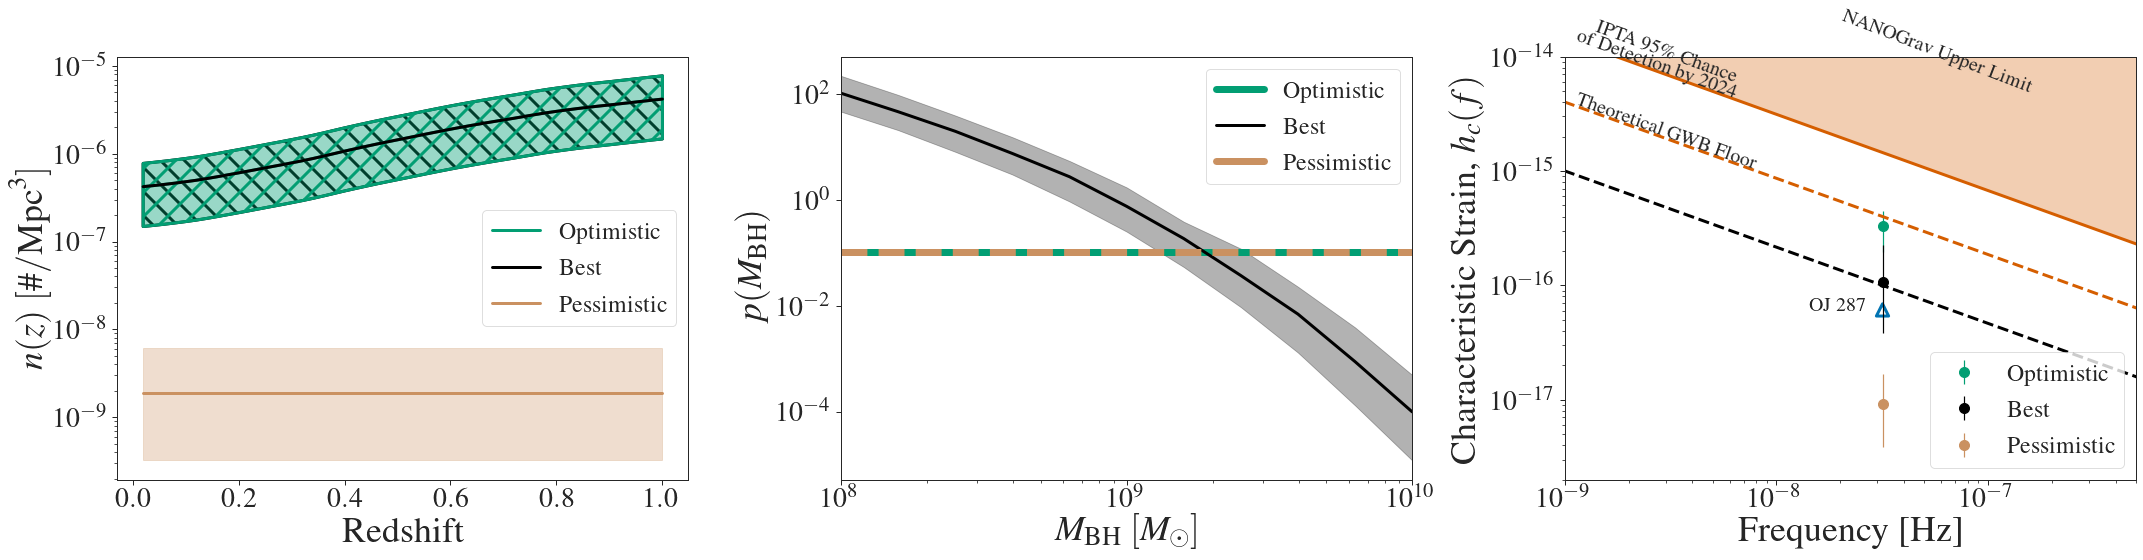

In [19]:
f, ax = plt.subplots(1,3,figsize=(30,8))
fsize = 36
legendfsize = 24
fsize2 = 20
ticksize = 28
ax[0].tick_params(labelsize = ticksize)
ax[1].tick_params(labelsize = ticksize)
ax[2].tick_params(labelsize = ticksize)

## for n(z) plot
zmask = zqso<=1.0
zlen = len(zqso[zmask])

##### Number density v redshift
ax[0].fill_between(zqso[zmask], nd_2[0][zmask], nd_2[2][zmask], edgecolor='black',hatch='\\', linewidth=3, facecolor='none')
ax[0].fill_between(zqso[zmask], nd_2[0][zmask], nd_2[2][zmask], edgecolor=cs[2], facecolor='none', linewidth=3, hatch='/')
ax[0].plot(zqso[zmask], nd_2[1][zmask], color=cs[2],label='Optimistic', linewidth=3)
ax[0].fill_between(zqso[zmask], nd_2[0][zmask], nd_2[2][zmask], color=cs[2], alpha=0.4)
ax[0].plot(zqso[zmask], nd_2[1][zmask], color='black', linestyle='solid', label='Best', linewidth=3)
ax[0].fill_between(zqso[zmask], nd_2[0][zmask], nd_2[2][zmask], color='none', edgecolor='black', hatch='\\')
ax[0].plot(zqso[zmask], nd_1[1]*np.ones((zlen)),c=cs[5], label='Pessimistic', linewidth=3)
ax[0].fill_between(zqso[zmask], nd_1[0]*np.ones((zlen)), nd_1[2]*np.ones((zlen)), color=cs[5], alpha=0.3)
ax[0].legend(fontsize=legendfsize)
ax[0].set_yscale('log')
ax[0].set_xlabel(r'Redshift',fontsize=fsize)
ax[0].set_ylabel(r'$n(z)\ [\rm{\#/Mpc}^3]$',fontsize=fsize)

##### pdf for mass
logMwidth = np.log10(DeltaM.value)
ax[1].plot(mass, 1./logMwidth*np.ones((len(mass))), color=cs[5], label='Pessimistic', linewidth=7)
ax[1].plot(mass, 1./logMwidth*np.ones((len(mass))), color=cs[2],label='Optimistic', linewidth=7)
ax[1].plot(mass, nmbh, 
               color='black', label='Best', linewidth=3)
ax[1].fill_between(mass,nmbh_l, nmbh_h, color='black',
                  alpha =0.3)

ax[1].plot(mass, 1./logMwidth*np.ones((len(mass))), color=cs[5], linestyle='dashed', linewidth=7)
ax[1].set_xlabel(r'$M_{\rm{BH}}\ [M_{\odot}]$',fontsize=fsize)
ax[1].set_ylabel(r'$p(M_{\rm{BH}})$',fontsize=fsize);
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim([1e8, 1e10])
handles, labels = ax[1].get_legend_handles_labels()
order = [1,2,0]
ax[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=legendfsize)

# ##### LIMITS
ax[2].loglog(freq, ptalimit, color=cs[3],linewidth=3)
ax[2].loglog(freq, 1.e-16*(freq/fidhz)**(-2./3.), color='black', linestyle='dashed',  linewidth=3)
ax[2].text(1.1e-9, 1.05e-15,'Theoretical GWB Floor', fontsize=fsize2, rotation=-20);
ax[2].errorbar(fidhz.value, hc_2, yerr=[[(hc_2-hc_2_l)], [(hc_2_h-hc_2)]], fmt='o', color=cs[2],markersize=10, label='Optimistic')
ax[2].errorbar(fidhz.value, hc_3, yerr=[[(hc_3-hc_3_l)],[(hc_3_h-hc_3)]], fmt='o',markersize=10, color='black',
             label='Best')
ax[2].errorbar(fidhz.value, hc_1[1],yerr=[[hc_1[1]-hc_1[0]],[hc_1[2]-hc_1[1]]], fmt='o',
             markersize=10, color=cs[5], label='Pessimistic')
ax[2].loglog(freq, iptafuturelimit, c=cs[3],linewidth=3, linestyle='dashed')
ax[2].text(1.1e-9, 4.3e-15, r'IPTA 95\% Chance\\ of Detection by 2024', rotation=-20,fontsize=fsize2)
ax[2].scatter(fidhz.value, 6.1e-17, color=cs[0], marker='^', s=150, facecolor='none', linewidth=3)
ax[2].text(fidhz.value-1.75e-8, 6.01e-17, 'OJ 287', fontsize=fsize2)
ax[2].fill_between(freq, ptalimit, 1.e-12*np.ones(len(freq)),alpha=0.3, color=cs[3])
ax[2].annotate('NANOGrav Upper Limit', xy=(2e-8, 5.e-15), rotation=-21,fontsize=fsize2)
# ax[2].legend(loc='lower right', frameon=True, framealpha=1.0, edgecolor='black', fontsize=legendfsize)
ax[2].legend(loc='lower right',fontsize=legendfsize)
ax[2].set_xlabel(r'Frequency [Hz]',fontsize=fsize)
ax[2].set_ylabel(r'Characteristic Strain, $h_c(f)$',fontsize=fsize)
ax[2].set_xlim([1.e-9, 5.e-7])
ax[2].set_ylim([2.e-18, 1.e-14])
plt.tight_layout()
plt.savefig('stochasticgwb_limits_3panel.png', dpi=500)

In [20]:
# Calculate mass for each object based on their luminosities, assuming L_edd / L = 1 (Goulding+ 2019)
# may be worth calculating explicitly from elecron scatter cross-section at some point, though it may not change much for this many sigfigs
m_agn_north = l_agn_north.to(u.Lsun) * (1e8 * u.Msun) / (3.2e12 * u.Lsun)  # approximation from Merritt 2013, pp. 42
m_agn_south = l_agn_south.to(u.Lsun) * (1e8 * u.Msun) / (3.2e12 * u.Lsun)
q = m_agn_north / m_agn_south
print("M_north = {0:.1e}".format(m_agn_north))
print("M_south = {0:.1e}".format(m_agn_south))
print("M_tot = {0:.1e}".format(m_agn_north + m_agn_south))
print("M_north / M_south = q = {0:.2f}".format(q))

M_north = 3.4e+08 solMass
M_south = 4.4e+08 solMass
M_tot = 7.8e+08 solMass
M_north / M_south = q = 0.78


Here we note that the values found above differ from those found by Goulding+ 2019, albeit not by a large factor. However, this difference is worth noting, as it may change some of the analysis. We will continue the analysis with Goulding+ 2019's originally reported values to compare to those found in the paper, before returning to use these values in an updated form of the analysis.

In [21]:
# integration parameters for GWB (Goulding+ 2019)
# updating chirp masses based on new q value
max_mchirp = (1. / (1 + q) ** 2) ** (3. / 5.) * 1.e10 * u.Msun 
min_mchirp = (1. / (1 + q) ** 2) ** (3. / 5.) * 1.e8 * u.Msun

## Case 1

In [22]:
## First, let's calculate the number density in Mpc^-3
lowestnd = numdensity(n_arcsecsq_lowest, 0., redshift)
print("Lowest number density is: ", lowestnd)

Lowest number density is:  1.8605414725377198e-09 1 / Mpc3


In [23]:
## How many SMBH binaries does this give us in our total integration volume?
totn_lowest = lowestnd * cosmo.comoving_volume(zmax)
print("Total number of black holes is: ", totn_lowest)

Total number of black holes is:  296.4394002243339


In [24]:
## Let's calculate the 1 sigma conf. intervals -- first just get abs. number in redshift range
lowestnd_l, lowestnd_h = poisson_conf_interval(1.0, interval='frequentist-confidence',sigma=1)

## Now multiply by num density to get the conf intervals in number density
lowestnd_l *= lowestnd
lowestnd_h *= lowestnd

## Finally, let's stack these together.
nd_1 = np.vstack([lowestnd_l, lowestnd, lowestnd_h])

nd_1

<Quantity [[3.21415570e-10],
           [1.86054147e-09],
           [6.13890600e-09]] 1 / Mpc3>

In [25]:
## Now calculate the number density/mass for all
DeltaM = max_mchirp - min_mchirp
ndm_1 = nd_1 / DeltaM
ndm_1

<Quantity [[6.47566964e-20],
           [3.74849666e-19],
           [1.23682643e-18]] 1 / (Mpc3 solMass)>

In [26]:
## Finally, calculate the characteristic strain
hc_1 = hc_constant_n(fidhz, ndm_1, zmin, zmax, min_mchirp, max_mchirp)
hc_1

<Quantity [[4.32473541e-18],
           [1.04050882e-17],
           [1.89004254e-17]]>

## Case 2

In [27]:
zqso, nz1_, nz2_, nz3_ = np.loadtxt('qso2_num_density.txt', unpack=True) ## each nz gives different eddington ratio
## nz1 = L/Ledd = 0.1
## nz2 = L/Ledd = 0.3
## nz3 = L/Ledd = 1.0
nz1_ = u.Quantity(nz1_, 1. / u.Mpc**3) * merger_frac
nz2_ = u.Quantity(nz2_, 1. / u.Mpc**3) * merger_frac
nz3_ = u.Quantity(nz3_, 1. / u.Mpc**3) * merger_frac

## we made originally callibrated these at z=0.2, so we need to account for that here and instead callibrate at z=0.
oh2index = np.where(zqso == 0.2)
nz1 = (nz1_[oh2index] - nz1_[0]) + nz1_
nz2 = (nz2_[oh2index] - nz2_[0]) + nz2_
nz3 = (nz3_[oh2index] - nz3_[0]) + nz3_

In [28]:
print("Number density at z=0, ", nz2[0])
print("Total number of galaxies, {0:.2e}".format(np.sum(nz2) * 0.02 * cosmo.comoving_volume(1.0)))

Number density at z=0,  4.2175e-07 1 / Mpc3
Total number of galaxies, 1.23e+06


In [29]:
#### Let's calculate the 1 sigma conf. intervals
absnumber1 = 826  # where do these numbers come from? Hopkins+ 2007
absnumber2 = 449
absnumber3 = 158
nz1_l, nz1_h = poisson_conf_interval(absnumber1, interval='frequentist-confidence', sigma=1)
nz2_l, nz2_h = poisson_conf_interval(absnumber2, interval='frequentist-confidence', sigma=1)
nz3_l, nz3_h = poisson_conf_interval(absnumber3, interval='frequentist-confidence', sigma=1)

print("Poisson errors", nz2_l, nz2_h)
print("Errors from Eddington Efficiency", nz2[0]-nz3[0], nz1[0]-nz2[0])

## Notice that the errors associated with not knowing the Eddington efficiency are much larger than the Poisson error.
## So, we will simply set the other eddington cases as the 1-sigma errors.

nd_2 = np.vstack([nz3, nz2, nz1])
nd_2[:,0]

Poisson errors 427.81826234441957 471.2053627104211
Errors from Eddington Efficiency 2.7335000249999995e-07 1 / Mpc3 3.53999975e-07 1 / Mpc3


<Quantity [1.48399997e-07, 4.21750000e-07, 7.75749975e-07] 1 / Mpc3>

The above is a factor of 2 higher than what is quoted in Goulding+ 2019. Why? Is this including less massive binaries? Or is this number a prediction for ALL QSOs (merger fraction accounted for above)?

In [30]:
## For this case, we are again assuming that N(M) is constant. So, we compute number density/mass the same as before
DeltaM = max_mchirp - min_mchirp
ndm_2 = nd_2 / DeltaM
ndm_2[:,0]

<Quantity [2.98986560e-17, 8.49714177e-17, 1.56293006e-16] 1 / (Mpc3 solMass)>

In [31]:
### Now, let's fit a spline to our data. This will let us integrate easily.
ndm_2_int = UnivariateSpline(zqso, ndm_2[1],s=0)
ndm_2_l_int = UnivariateSpline(zqso, ndm_2[0],s=0)
ndm_2_h_int = UnivariateSpline(zqso, ndm_2[2],s=0)

In [32]:
## Ok, now we can *finally* get the characteristic strain for this case.
hc_2 = hc_with_nz(fidhz, ndm_2_int, zmin, zmax, min_mchirp, max_mchirp)
hc_2_l = hc_with_nz(fidhz, ndm_2_l_int, zmin, zmax, min_mchirp, max_mchirp)
hc_2_h = hc_with_nz(fidhz, ndm_2_h_int, zmin, zmax, min_mchirp, max_mchirp)
print(hc_2_l)
print(hc_2)
print(hc_2_h)

2.203367242554503e-16
3.714475382676183e-16
5.037682923705914e-16


## Case 3

In [33]:
## We start with the same n(z) as in case 2.
ndm_3 = ndm_2
ndm_3[:,0]

<Quantity [2.98986560e-17, 8.49714177e-17, 1.56293006e-16] 1 / (Mpc3 solMass)>

In [34]:
## Let's load the mass function
logMbh,logMbhdNdMbh,lo16th,up84th = np.loadtxt('marconi_num_density.txt', unpack=True, delimiter=',')
massmask = logMbh >= 8.
mbhdNdMbh = 10**logMbhdNdMbh[massmask]
mass = 10**logMbh[massmask]
mbhdNdMbh_l = 10**lo16th[massmask]
mbhdNdMbh_h = 10**up84th[massmask]

dNdMbh = mbhdNdMbh/(mass)
dNdMbh_l = mbhdNdMbh_l/(mass)
dNdMbh_h = mbhdNdMbh_h/(mass)

In [35]:
## now get p(M) -- first find normalization constant
## we want the integral over dNdMbh = ndm_2
norm = cumtrapz(dNdMbh/ndm_2[1,0], mass)[-1]
norm_h = cumtrapz(dNdMbh_h/ndm_2[1,0],mass)[-1]
norm_l = cumtrapz(dNdMbh_l/ndm_2[1,0],mass)[-1]
nmbh = dNdMbh*norm
nmbh_h = dNdMbh_h*norm_h
nmbh_l = dNdMbh_l*norm_l

## get spline
nmbh_int = UnivariateSpline(mass, nmbh, s=0)
nmbh_h_int = UnivariateSpline(mass, nmbh_h, s=0)
nmbh_l_int = UnivariateSpline(mass, nmbh_l, s=0)

In [36]:
## finally, get the characteristic strain
hc_3 = hc_with_nzm(fidhz, ndm_2_int, nmbh_int, zmin, zmax, min_mchirp, max_mchirp)
hc_3_h = hc_with_nzm(fidhz, ndm_2_h_int, nmbh_h_int, zmin, zmax, min_mchirp, max_mchirp)
hc_3_l = hc_with_nzm(fidhz, ndm_2_l_int, nmbh_l_int, zmin, zmax, min_mchirp, max_mchirp)
print(hc_3_l)
print(hc_3)
print(hc_3_h)

3.924875746825326e-17
1.141939729468313e-16
2.2919029803920554e-16


The strain quoted here matches Goulding 2019+, but not the intervals quoted. Are quoted intervals 2 sigma? Answer: Last minute changes to the code that need to be tracked down.

## Plots

<ipython-input-37-f4b46c5ee338>:54: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax[2].errorbar(fidhz.value, hc_1[1],yerr=[[hc_1[1]-hc_1[0]],[hc_1[2]-hc_1[1]]], fmt='o',


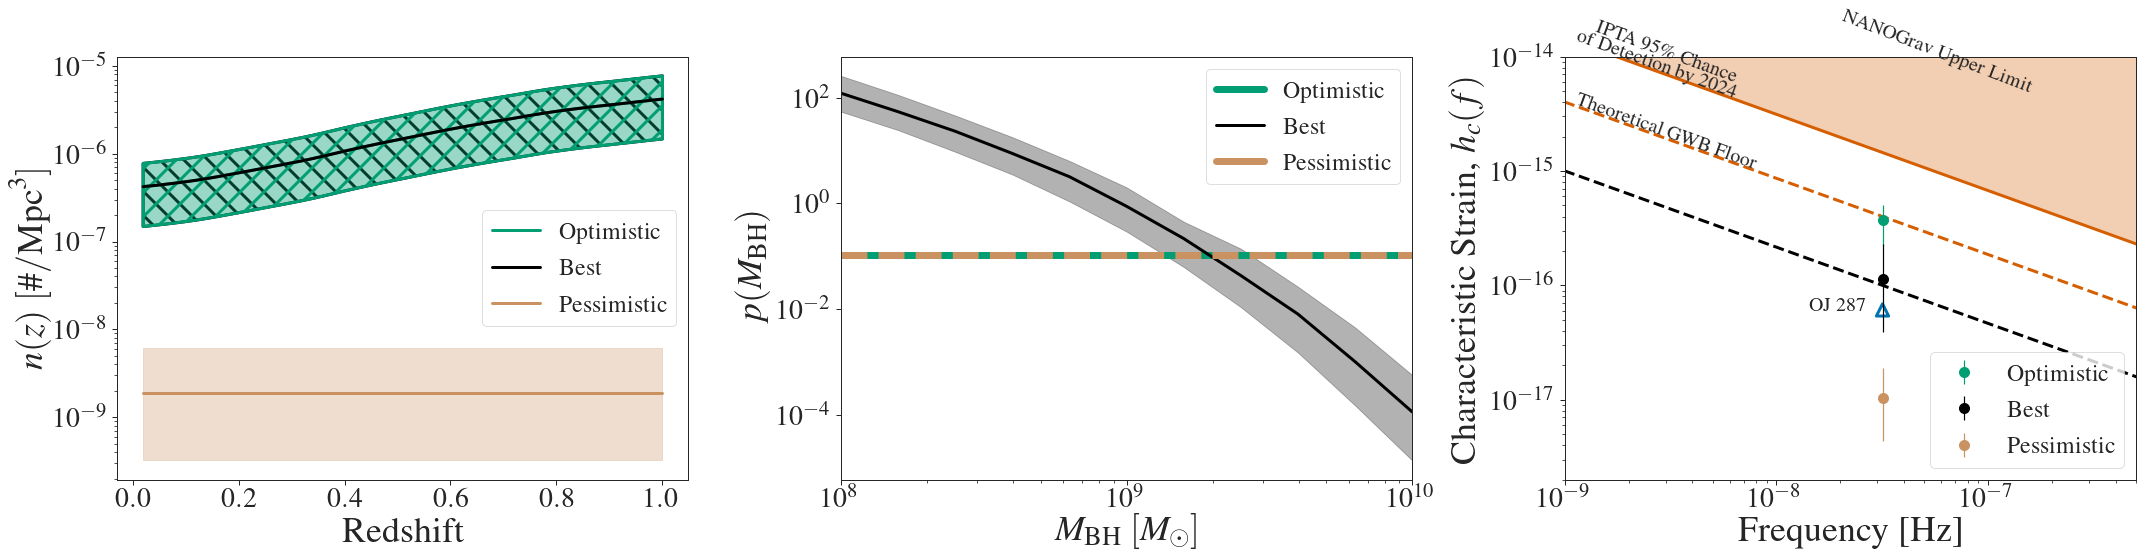

In [37]:
f, ax = plt.subplots(1,3,figsize=(30,8))
fsize = 36
legendfsize = 24
fsize2 = 20
ticksize = 28
ax[0].tick_params(labelsize = ticksize)
ax[1].tick_params(labelsize = ticksize)
ax[2].tick_params(labelsize = ticksize)

## for n(z) plot
zmask = zqso<=1.0
zlen = len(zqso[zmask])

##### Number density v redshift
ax[0].fill_between(zqso[zmask], nd_2[0][zmask], nd_2[2][zmask], edgecolor='black',hatch='\\', linewidth=3, facecolor='none')
ax[0].fill_between(zqso[zmask], nd_2[0][zmask], nd_2[2][zmask], edgecolor=cs[2], facecolor='none', linewidth=3, hatch='/')
ax[0].plot(zqso[zmask], nd_2[1][zmask], color=cs[2],label='Optimistic', linewidth=3)
ax[0].fill_between(zqso[zmask], nd_2[0][zmask], nd_2[2][zmask], color=cs[2], alpha=0.4)
ax[0].plot(zqso[zmask], nd_2[1][zmask], color='black', linestyle='solid', label='Best', linewidth=3)
ax[0].fill_between(zqso[zmask], nd_2[0][zmask], nd_2[2][zmask], color='none', edgecolor='black', hatch='\\')
ax[0].plot(zqso[zmask], nd_1[1]*np.ones((zlen)),c=cs[5], label='Pessimistic', linewidth=3)
ax[0].fill_between(zqso[zmask], nd_1[0]*np.ones((zlen)), nd_1[2]*np.ones((zlen)), color=cs[5], alpha=0.3)
ax[0].legend(fontsize=legendfsize)
ax[0].set_yscale('log')
ax[0].set_xlabel(r'Redshift',fontsize=fsize)
ax[0].set_ylabel(r'$n(z)\ [\rm{\#/Mpc}^3]$',fontsize=fsize)

##### pdf for mass
logMwidth = np.log10(DeltaM.value)
ax[1].plot(mass, 1./logMwidth*np.ones((len(mass))), color=cs[5], label='Pessimistic', linewidth=7)
ax[1].plot(mass, 1./logMwidth*np.ones((len(mass))), color=cs[2],label='Optimistic', linewidth=7)
ax[1].plot(mass, nmbh, 
               color='black', label='Best', linewidth=3)
ax[1].fill_between(mass,nmbh_l, nmbh_h, color='black',
                  alpha =0.3)

ax[1].plot(mass, 1./logMwidth*np.ones((len(mass))), color=cs[5], linestyle='dashed', linewidth=7)
ax[1].set_xlabel(r'$M_{\rm{BH}}\ [M_{\odot}]$',fontsize=fsize)
ax[1].set_ylabel(r'$p(M_{\rm{BH}})$',fontsize=fsize);
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim([1e8, 1e10])
handles, labels = ax[1].get_legend_handles_labels()
order = [1,2,0]
ax[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=legendfsize)

# ##### LIMITS
ax[2].loglog(freq, ptalimit, color=cs[3],linewidth=3)
ax[2].loglog(freq, 1.e-16*(freq/fidhz)**(-2./3.), color='black', linestyle='dashed',  linewidth=3)
ax[2].text(1.1e-9, 1.05e-15,'Theoretical GWB Floor', fontsize=fsize2, rotation=-20);
ax[2].errorbar(fidhz.value, hc_2, yerr=[[(hc_2-hc_2_l)], [(hc_2_h-hc_2)]], fmt='o', color=cs[2],markersize=10, label='Optimistic')
ax[2].errorbar(fidhz.value, hc_3, yerr=[[(hc_3-hc_3_l)],[(hc_3_h-hc_3)]], fmt='o',markersize=10, color='black',
             label='Best')
ax[2].errorbar(fidhz.value, hc_1[1],yerr=[[hc_1[1]-hc_1[0]],[hc_1[2]-hc_1[1]]], fmt='o',
             markersize=10, color=cs[5], label='Pessimistic')
ax[2].loglog(freq, iptafuturelimit, c=cs[3],linewidth=3, linestyle='dashed')
ax[2].text(1.1e-9, 4.3e-15, r'IPTA 95\% Chance\\ of Detection by 2024', rotation=-20,fontsize=fsize2)
ax[2].scatter(fidhz.value, 6.1e-17, color=cs[0], marker='^', s=150, facecolor='none', linewidth=3)
ax[2].text(fidhz.value-1.75e-8, 6.01e-17, 'OJ 287', fontsize=fsize2)
ax[2].fill_between(freq, ptalimit, 1.e-12*np.ones(len(freq)),alpha=0.3, color=cs[3])
ax[2].annotate('NANOGrav Upper Limit', xy=(2e-8, 5.e-15), rotation=-21,fontsize=fsize2)
# ax[2].legend(loc='lower right', frameon=True, framealpha=1.0, edgecolor='black', fontsize=legendfsize)
ax[2].legend(loc='lower right',fontsize=legendfsize)
ax[2].set_xlabel(r'Frequency [Hz]',fontsize=fsize)
ax[2].set_ylabel(r'Characteristic Strain, $h_c(f)$',fontsize=fsize)
ax[2].set_xlim([1.e-9, 5.e-7])
ax[2].set_ylim([2.e-18, 1.e-14])
plt.tight_layout()
plt.savefig('stochasticgwb_limits_3panel.png', dpi=500)